In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [3]:
# Sigmoid funtion is widely used for fitting clasification data
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
# Generate an array of evenly spaced values between -10 and 10
x = np.arange(-10,11)
y = sigmoid(x)

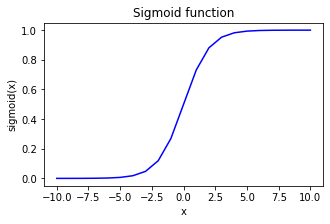

In [5]:
# Plotting sigmoid function
fig, ax = plt.subplots(1, 1, figsize = (5, 3))
ax.plot(x, y, c = 'b')
ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(x)')
ax.set_xlabel('x')
plt.show()

In [6]:
# Logistic regression model applies sigmoid to familiar linear regression model

# Set up our data
x_tdata = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_tdata = np.array([0, 0, 0, 1, 1, 1])

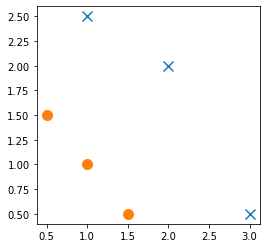

In [15]:
# Plot the generated dataset with markers representing respective values
fig, ax = plt.subplots(1,1, figsize = (4, 4))

ones = y_tdata == 1
zeros = y_tdata == 0

ax.scatter(x_tdata[ones, 0], x_tdata[ones, 1], s = 100, marker='x')
ax.scatter(x_tdata[zeros, 0], x_tdata[zeros, 1], s = 100, marker='o')

In [16]:
# Put our linear model into separate function
def linear_model(x, a, b):
    return np.dot(x,a) + b

In [21]:
# Cost function for a sigmoid. Not that much diference from linear cost
def compute_cost(x, y, a, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        sig_res = sigmoid(linear_model(x[i], a, b))
        cost += -y[i] * np.log(sig_res) - (1 - y[i]) * np.log(1 - sig_res)
    
    cost = cost / m
    return cost

In [22]:
# Test our cost function
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost(x_tdata, y_tdata, w_tmp, b_tmp))

0.36686678640551745


In [17]:
# Gradient function is also pretty much the same
def compute_gradient(x, y, a, b):
    # Fguring out the shape of our input parameters (will be same for output)
    m, n = x.shape

    # Setting up initial parameters for partial derivatives
    dda = np.zeros((n,))
    ddb = 0

    # Do summing according to cost function gradient formula with the for loop
    for i in range(m):
        sigm = sigmoid(linear_model(x[i], a, b))
        diff = (sigm - y[i])
        for j in range(n):
            dda[j] = dda[j] + diff * x[i, j]
        ddb = ddb + diff

    # Return respective gradient (as a vector of partial derivatives)
    dda = dda / m
    ddb = ddb / m  

    return dda, ddb


In [23]:
# The logic of computing gradient descent stays the same
def gradient_descent(x, y, a_in, b_in, alpha, num_iters):
    # Copying coefficients initial values
    a = copy.deepcopy(a_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate gradient terms
        dda, ddb = compute_gradient(x, y, a, b)

        # Update coefficients
        a = a - alpha * dda
        b = b - alpha * ddb

    return a, b

In [24]:
# Testing our gradient function. Starting with creating variables to pass in
a_tmp  = np.zeros_like(x_tdata[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

a_out, b_out = gradient_descent(x_tdata, y_tdata, a_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{a_out}, b:{b_out}")


updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


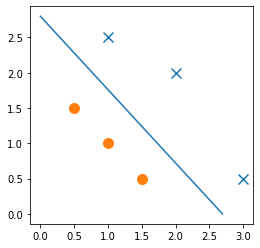

In [25]:
# Plot the resulting boundary of the model
fig,ax = plt.subplots(1,1,figsize=(4,4))

ones = y_tdata == 1
zeros = y_tdata == 0

ax.scatter(x_tdata[ones, 0], x_tdata[ones, 1], s = 100, marker='x')
ax.scatter(x_tdata[zeros, 0], x_tdata[zeros, 1], s = 100, marker='o')

# Plot the decision boundary
x0 = -b_out/a_out[0]
x1 = -b_out/a_out[1]
ax.plot([0,x0],[x1,0])

plt.show()